In [67]:
import pandas
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import pickle
import seaborn as sn
import matplotlib.pyplot as plt

NUMBER_OF_FEATURES = 8

In [68]:
url = "mexico_covid19.csv"
names = ["Gender","Neumonia","Age","Pregnant","Diabetes","Astma","ImmunoSuppressed","Hypertension","Cardiovascular","Obese","Smoking","PatientOutcome"]
dtypes = {'Gender': 'int', 'Neumonia': 'int', 'Age': 'int', 'Pregnant':'Int64', 'Diabetes':'int', 'Astma':'int', 
          'ImmunoSuppressed':'int', 'Hypertension': 'int', 'Cardiovascular': 'int', 'Obese': 'int', 
          'Smoking': 'int', 'PatientOutcome': 'int'}

data = pandas.read_csv(url, names=names, dtype=dtypes, header=1, keep_default_na=False, na_values=['NA'])


In [75]:
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(data[['Pregnant']])
data['Pregnant'] = imr.transform(data[['Pregnant']]).ravel()
data.columns

Index(['Gender', 'Neumonia', 'Age', 'Pregnant', 'Diabetes', 'Astma',
       'ImmunoSuppressed', 'Hypertension', 'Cardiovascular', 'Obese',
       'Smoking', 'PatientOutcome'],
      dtype='object')

In [80]:
y = data['PatientOutcome']
X = data.drop('PatientOutcome', axis=1)

from sklearn.feature_selection import SelectKBest, mutual_info_regression

np.random.seed(1337)
selector = SelectKBest(mutual_info_regression, k = NUMBER_OF_FEATURES)
X.columns
selector.fit(X, y)
columns = data.columns[np.append(selector.get_support(), True)]
columns

Index(['Gender', 'Neumonia', 'Age', 'Diabetes', 'Astma', 'Hypertension',
       'Obese', 'Smoking', 'PatientOutcome'],
      dtype='object')

            Gender  Neumonia       Age     Obese
Gender    1.000000  0.024153  0.009124  0.008476
Neumonia  0.024153  1.000000  0.063505  0.010694
Age       0.009124  0.063505  1.000000  0.019676
Obese     0.008476  0.010694  0.019676  1.000000


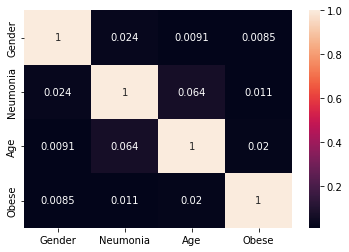

In [95]:
candidate = X[X.columns[selector.get_support()]]
candidate = candidate.drop('Hypertension', axis=1)
candidate = candidate.drop('Smoking', axis=1)
candidate = candidate.drop('Astma', axis=1)
candidate = candidate.drop('Diabetes', axis=1)

candidate
corrMatrix = candidate.corr()

print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()



In [99]:
np.append(candidate.columns, 'PatientOutcome')

array = data[np.append(candidate.columns, 'PatientOutcome')].values

x = array[:, 0:4]
y = array[:, 4]
test_size = 0.33
seed = 7

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(x_train, y_train)
candidate.columns

Index(['Gender', 'Neumonia', 'Age', 'Obese'], dtype='object')

In [98]:
filename = 'covid19_model_v2.sav'
pickle.dump(model, open(filename, 'wb'))
print('done')

done
